In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import time
import gc
from itertools import product
import functions as func
import dp
import pickle
from datetime import datetime
plt.rcdefaults()

In [2]:
# Use same behaviour which was used for model training
cust_behaviour_loaded = pd.read_csv("model_eval/cust_behaviour.csv")
cust_behaviour = cust_behaviour_loaded.drop(["Unnamed: 0"], axis=1)
cust_behaviour.head()

,t1_buy,t2_buy,t3_buy,t1_prom,t2_prom,t3_prom,p_no_prom,size_no_prom,p_prom,size_prom
0,0,0,0,0,0,0,0.100,91.148432,0.108663,117.402849
1,0,0,0,0,0,1,0.075,103.253110,0.086212,108.424488
2,0,0,0,0,1,0,0.250,115.320971,0.255749,105.969691
3,0,0,0,0,1,1,0.200,88.985190,0.213235,87.371531
4,0,0,0,1,0,0,0.300,78.799490,0.337345,94.609321


In [3]:
cust_behaviour_1 = cust_behaviour
for i in range(1,41):
    c = str(i)
    cust_behaviour_solver_solution = pd.read_csv("ampl/cust_behaviour_dp/cust_behaviour_solver_solution_c" + c + ".csv")
    cust_behaviour_solver_solution = cust_behaviour_solver_solution[["w1","w2","w3","a1","a2","a3","q_value_prom","q_value_no_prom","q_value_diff"]]
    cust_behaviour_solver_solution = cust_behaviour_solver_solution.rename(columns={"q_value_prom" : "q_value_prom_c"+c, "q_value_no_prom":"q_value_no_prom_c"+c, "q_value_diff":"q_value_diff_c"+c})
    cust_behaviour_1 = cust_behaviour_1.merge(cust_behaviour_solver_solution, how="inner", left_on=["t1_buy","t2_buy","t3_buy","t1_prom","t2_prom","t3_prom"], right_on=["a1","a2","a3","w1","w2","w3"])
    cust_behaviour_1 = cust_behaviour_1.drop(["a1","a2","a3","w1","w2","w3"], axis=1)

In [4]:
c = str(0.01)
cust_behaviour_solver_solution = pd.read_csv("ampl/cust_behaviour_dp/cust_behaviour_solver_solution_c" + c + ".csv")
cust_behaviour_solver_solution = cust_behaviour_solver_solution[["w1","w2","w3","a1","a2","a3","q_value_prom","q_value_no_prom","q_value_diff"]]
cust_behaviour_solver_solution = cust_behaviour_solver_solution.rename(columns={"q_value_prom" : "q_value_prom_c"+c, "q_value_no_prom":"q_value_no_prom_c"+c, "q_value_diff":"q_value_diff_c"+c})
cust_behaviour_1 = cust_behaviour_1.merge(cust_behaviour_solver_solution, how="inner", left_on=["t1_buy","t2_buy","t3_buy","t1_prom","t2_prom","t3_prom"], right_on=["a1","a2","a3","w1","w2","w3"])
cust_behaviour_1 = cust_behaviour_1.drop(["a1","a2","a3","w1","w2","w3"], axis=1)
c = str(10000)
cust_behaviour_solver_solution = pd.read_csv("ampl/cust_behaviour_dp/cust_behaviour_solver_solution_c" + c + ".csv")
cust_behaviour_solver_solution = cust_behaviour_solver_solution[["w1","w2","w3","a1","a2","a3","q_value_prom","q_value_no_prom","q_value_diff"]]
cust_behaviour_solver_solution = cust_behaviour_solver_solution.rename(columns={"q_value_prom" : "q_value_prom_c"+c, "q_value_no_prom":"q_value_no_prom_c"+c, "q_value_diff":"q_value_diff_c"+c})
cust_behaviour_1 = cust_behaviour_1.merge(cust_behaviour_solver_solution, how="inner", left_on=["t1_buy","t2_buy","t3_buy","t1_prom","t2_prom","t3_prom"], right_on=["a1","a2","a3","w1","w2","w3"])
cust_behaviour_1 = cust_behaviour_1.drop(["a1","a2","a3","w1","w2","w3"], axis=1)
c = str(50)
cust_behaviour_solver_solution = pd.read_csv("ampl/cust_behaviour_dp/cust_behaviour_solver_solution_c" + c + ".csv")
cust_behaviour_solver_solution = cust_behaviour_solver_solution[["w1","w2","w3","a1","a2","a3","q_value_prom","q_value_no_prom","q_value_diff"]]
cust_behaviour_solver_solution = cust_behaviour_solver_solution.rename(columns={"q_value_prom" : "q_value_prom_c"+c, "q_value_no_prom":"q_value_no_prom_c"+c, "q_value_diff":"q_value_diff_c"+c})
cust_behaviour_1 = cust_behaviour_1.merge(cust_behaviour_solver_solution, how="inner", left_on=["t1_buy","t2_buy","t3_buy","t1_prom","t2_prom","t3_prom"], right_on=["a1","a2","a3","w1","w2","w3"])
cust_behaviour_1 = cust_behaviour_1.drop(["a1","a2","a3","w1","w2","w3"], axis=1)

In [5]:
cust_behaviour_1["kipppunkt"] = "40"
for i in range(0,40):
    c = 40 - i
    for ind in cust_behaviour_1.index:
        q_value_diff = cust_behaviour_1.loc[ind,"q_value_diff_c"+str(c)]
        if q_value_diff < 0:
            cust_behaviour_1.loc[ind, "kipppunkt"] = c
cust_behaviour_1.to_csv("model_eval/cust_behaviour_with_dp_solution.csv", sep=';', decimal=',')
cust_behaviour_1.head(5)

,t1_buy,t2_buy,t3_buy,t1_prom,t2_prom,t3_prom,p_no_prom,size_no_prom,p_prom,size_prom,...,q_value_prom_c0.01,q_value_no_prom_c0.01,q_value_diff_c0.01,q_value_prom_c10000,q_value_no_prom_c10000,q_value_diff_c10000,q_value_prom_c50,q_value_no_prom_c50,q_value_diff_c50,kipppunkt
0,0,0,0,0,0,0,0.100,91.148432,0.108663,117.402849,...,5872.060,5847.288,24.772,-9095.984,887.029,-9983.013,854.016,887.029,-33.013,25
1,0,0,0,0,0,1,0.075,103.253110,0.086212,108.424488,...,5895.314,5859.280,36.034,-9093.847,902.470,-9996.317,856.153,902.470,-46.317,25
2,0,0,0,0,1,0,0.250,115.320971,0.255749,105.969691,...,5885.119,5865.692,19.427,-9084.834,903.436,-9988.270,865.166,903.436,-38.270,20
3,0,0,0,0,1,1,0.200,88.985190,0.213235,87.371531,...,5920.520,5865.593,54.926,-9072.574,906.598,-9979.172,877.426,906.598,-29.172,26
4,0,0,0,1,0,0,0.300,78.799490,0.337345,94.609321,...,5881.333,5854.612,26.721,-9087.080,894.047,-9981.127,862.920,894.047,-31.127,25


In [6]:
cust_behaviour = cust_behaviour_1

In [7]:
screenshot = cust_behaviour[['t1_buy', 't2_buy', 't3_buy', 't1_prom', 't2_prom', 't3_prom', 'q_value_prom_c1', 'q_value_no_prom_c1', 'q_value_diff_c1']] # , 'p_no_prom', 'size_no_prom', 'p_prom', 'size_prom', 'kipppunkt'
screenshot = screenshot.rename(columns={"q_value_prom_c1" : "q_value_prom", "q_value_no_prom_c1" : "q_value_no_prom", "q_value_diff_c1": "q_value_diff"}) # , "kipppunkt" : "threshold"
screenshot[25:30]

,t1_buy,t2_buy,t3_buy,t1_prom,t2_prom,t3_prom,q_value_prom,q_value_no_prom,q_value_diff
25,0,1,1,0,0,1,5709.616,5681.633,27.983
26,0,1,1,0,1,0,5699.205,5678.527,20.678
27,0,1,1,0,1,1,5736.876,5680.640,56.236
28,0,1,1,1,0,0,5697.333,5672.084,25.249
29,0,1,1,1,0,1,5711.889,5683.194,28.695


In [8]:
screenshot = cust_behaviour[['t1_buy', 't2_buy', 't3_buy', 't1_prom', 't2_prom', 't3_prom', 'q_value_prom_c25', 'q_value_no_prom_c25', 'q_value_diff_c25', 'kipppunkt']] # , 'p_no_prom', 'size_no_prom', 'p_prom', 'size_prom', 'kipppunkt'
screenshot = screenshot.rename(columns={"kipppunkt" : "threshold"}) # , "kipppunkt" : "threshold"
screenshot[26:29]

,t1_buy,t2_buy,t3_buy,t1_prom,t2_prom,t3_prom,q_value_prom_c25,q_value_no_prom_c25,q_value_diff_c25,threshold
26,0,1,1,0,1,0,905.126,913.991,-8.865,22
27,0,1,1,0,1,1,936.876,912.380,24.496,33
28,0,1,1,1,0,0,898.597,905.957,-7.360,25


In [9]:
models_training_set_sizes = [10000, 8000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 200, 100, 50]

model_set = [("models/", "full"), ("models_features_2_periods/", "2_periods"), ("models_features_1_period/", "1_period"), ("models_features_without_prom/", "without_prom")] 

path = model_set[0][0]

today = datetime.today().strftime('%y_%m_%d_')
prefix = datetime.today().strftime('%y_%m_%d_')

In [ ]:
path = "auswahlpolitiken_eval/"

# Long Term Evaluation
runs = 3
cust_count = 1000 
first_cust_nr = 100000
fix_order_costs = 9.0
margin = 0.5
cost_per_prom = 1.0
periods = 24 
promotions = [[0, 0], [1000, 1000], [2000, 2000], [3000, 3000], [4000, 4000], [5000, 5000], [6000, 6000], [7000, 7000], [8000, 8000], [9000, 9000], [10000, 10000]]
promotions = [[0, 0], [100, 100], [200, 200], [300, 300], [400, 400], [500, 500], [600, 600], [700, 700], [800, 800], [900, 900], [1000, 1000]]
#promotions = [[500, 500]]
history = ["cust_nrs", "t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "t1_size", "t2_size", "t3_size"]

log_filepath = path + "performance_log_"+prefix+"_simulation_long_term_"+str(periods)+"_periods.csv"
info = '' 
print_out = True
write_header = False
start_time = time.time_ns()
last_step_time = time.time_ns()
eval_runs_exists = False

last_step_time = func.write_performance_log(log_filepath, 'start', 'start', 'start', start_time, last_step_time, 0, info, print_out, True)
for run in range(1, runs + 1):        
    customers = func.create_cust_with_initial_behaviour(cust_count, first_cust_nr)
    orders_pre = customers
    orders_pre = orders_pre[history]
    for period in range(0, 12):
        orders_pre = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, int(cust_count/2) , int(cust_count/2), period, "random")
    cust = orders_pre[history]

    for prom in promotions:
        min_proms = prom[0]
        max_proms = prom[1]

        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'start', start_time, last_step_time, 0, info, print_out, False)
        logfilepath = path + prefix + "dp_policy_simulation_log.csv"
        orders_balanced_c = cust.copy()
        for period in range(1, periods+1):
            orders_balanced_c = orders_balanced_c[history] #.merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_balanced_c_1 = dp.decide_with_dp(cust_behaviour, orders_balanced_c, max_proms, logfilepath) #func.send_prom_to_highest_kipppunkt(orders_balanced_c, max_proms, min_proms)
            orders_balanced_c = func.generate_orders(orders_balanced_c_1, margin, fix_order_costs, cost_per_prom)
            orders_balanced_c["profit"] = orders_balanced_c["size"] * margin - (orders_balanced_c["has_bought"] * fix_order_costs) - (orders_balanced_c["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_balanced_c, "c_balanced")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        #del(orders_balanced_c)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'c_dp_balanced_cost', start_time, last_step_time, 0, info, print_out, False)

eval_runs.to_csv(path + prefix + "simulation_long_term_"+str(periods)+"_periods.csv", sep=';', decimal=',')
print(path + prefix + "simulation_long_term_"+str(periods)+"_periods.csv")
eval_runs

In [1]:
orders_balanced_c_1["Q_1-Q_0"] = orders_balanced_c_1["Q_1"] - orders_balanced_c_1["Q_0"] 
q_0_1 = orders_balanced_c_1[["Q_0", "Q_1", "Q_1-Q_0", "send_prom"]].sort_values("Q_1-Q_0").reset_index()
q_0_1[490:510]

NameError: name 'orders_balanced_c_1' is not defined

In [ ]:
for period in range(0, 12):
        orders_pre = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, int(cust_count/2) , int(cust_count/2), period, "random")
cust = orders_pre[history]
orders_balanced_c = orders_balanced_c[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))

In [ ]:
orders_balanced_c = dp.decide_with_dp(cust_behaviour, customers, max_proms, logfilepath)

### Simulation

In [10]:
# Evaluierung einer Periode 4.4
# Die verschiedenen Schätzmethoden werden in einem Experiment mit dem Simulationsmodell ausprobiert. Die Güte der Schätzmethoden sollen miteinander verglichen werden. 
runs = 3
cust_count = 10000
first_cust_nr = 100000
fix_order_costs = 9.0
margin = 0.5
cost_per_prom = 1.0

promotions = [[0, 0], [1000, 1000], [2000, 2000], [3000, 3000], [4000, 4000], [5000, 5000], [6000, 6000], [7000, 7000], [8000, 8000], [9000, 9000], [10000, 10000], [0, 10000]]
#promotions = [[0, 0], [1000, 1000], [2000, 2000], [3000, 3000], [4000, 4000], [5000, 5000], [6000, 6000], [7000, 7000], [8000, 8000], [9000, 9000], [10000, 10000], [0, 10000], [0, 9000], [0, 8000], [0, 7000], [0, 6000], [0, 5000], [0, 4000], [0, 3000], [0, 2000], [0, 1000]]
#promotions = [[0, 0], [100, 100], [200, 200], [300, 300], [400, 400], [500, 500], [600, 600], [700, 700], [800, 800], [900, 900], [1000, 1000]]
history = ["cust_nrs", "t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "t1_size", "t2_size", "t3_size"]
# models_training_set_sizes = [10000, 8000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 200, 100, 50]
models_training_set_sizes = [10000]
eval_runs_exists = False

for tuple in model_set:
    path = tuple[0]
    feature_set = tuple[1]
    print(path)
    print(feature_set)
    for training_set_size in models_training_set_sizes:
        logit, random_forest_clf, gtb_clf, linear, random_forest_regr, gtb_regr = func.load_models(str(training_set_size), path)
        for run in range(1, runs + 1):
            customers = func.create_cust_with_initial_behaviour(cust_count, first_cust_nr)
            orders_pre = customers
            for period in range(0, 12):
                orders_pre = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, int(cust_count/2), int(cust_count/2), period, "random")
                orders_pre = orders_pre[history]
            for prom in promotions:
                min_proms = prom[0]
                max_proms = prom[1]
                orders_opt = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "optimal")
                orders_rf_rf = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", random_forest_clf, random_forest_regr)
                orders_rf_linear = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", random_forest_clf, linear)
                orders_rf_gtb = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", random_forest_clf, gtb_regr)
                orders_logit_rf = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", logit, random_forest_regr)
                orders_logit_linear = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", logit, linear)
                orders_logit_gtb = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", logit, gtb_regr)
                orders_gtb_rf = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", gtb_clf, random_forest_regr)
                orders_gtb_linear = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", gtb_clf, linear)
                orders_gtb_gtb = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, max_proms, min_proms, period, feature_set, "estimated", gtb_clf, gtb_regr)
                eval_run = pd.concat([
                    func.get_kpis(orders_opt, "z_optimal"),
                    func.get_kpis(orders_rf_rf, "rf_rf"), 
                    func.get_kpis(orders_rf_linear, "rf_linear"), 
                    func.get_kpis(orders_rf_gtb, "rf_gtb"), 
                    func.get_kpis(orders_logit_rf, "logit_rf"), 
                    func.get_kpis(orders_logit_linear, "logit_linear"), 
                    func.get_kpis(orders_logit_gtb, "logit_gtb"), 
                    func.get_kpis(orders_gtb_rf, "gtb_rf"), 
                    func.get_kpis(orders_gtb_linear, "gtb_linear"), 
                    func.get_kpis(orders_gtb_gtb, "gtb_gtb")
                    ])
                eval_run["run"] = run
                eval_run["min_proms"] = min_proms
                eval_run["max_proms"] = max_proms
                eval_run["model_training_set_size"] = training_set_size
                if eval_runs_exists:
                    eval_runs = pd.concat([eval_runs, eval_run])
                else:
                    eval_runs = eval_run
                    eval_runs_exists = True
                print("Training Set Size " + str(training_set_size) + " Run " + str(run) + " Prom "+ str(prom))
                    
    eval_runs.to_csv(path + prefix + "simulation_short_term_compare_prediction_methods_all.csv", sep=';', decimal=',')
    eval_runs.head()

models/
full
Training Set Size 10000 Run 1 Prom [0, 0]
Training Set Size 10000 Run 1 Prom [1000, 1000]
Training Set Size 10000 Run 1 Prom [2000, 2000]
Training Set Size 10000 Run 1 Prom [3000, 3000]
Training Set Size 10000 Run 1 Prom [4000, 4000]
Training Set Size 10000 Run 1 Prom [5000, 5000]
Training Set Size 10000 Run 1 Prom [6000, 6000]
Training Set Size 10000 Run 1 Prom [7000, 7000]
Training Set Size 10000 Run 1 Prom [8000, 8000]


In [22]:
prefix = '23_02_14_'
e_without = pd.read_csv(model_set[3][0] + prefix + "simulation_short_term_compare_prediction_methods_all.csv", sep=';', decimal=',')
e_without = e_without.drop(["Unnamed: 0"], axis=1)
e_without = e_without.groupby(["model_training_set_size", "min_proms", "max_proms", "models"]).mean().round(2).drop(["run"], axis=1)
e_without = e_without.reset_index()
e_without["%_opt"] = (e_without.apply(lambda row: (row["profit"] / func.get_optimal_profit(e_without, row["model_training_set_size"], row["min_proms"], row["max_proms"], "z_optimal") * 100.0), axis=1)).round(2)
e_without["predictors"] = "ohne Werbehistorie" 
e_without["row"] = 2
e_without["col"] = 1
e_without.to_csv(model_set[3][0] + prefix + "simulation_short_term_compare_prediction_methods_all_%_opt.csv", sep=';', decimal=',')

e_1_periods = pd.read_csv(model_set[2][0] + prefix + "simulation_short_term_compare_prediction_methods_all.csv", sep=';', decimal=',')
e_1_periods = e_1_periods.drop(["Unnamed: 0"], axis=1)
e_1_periods = e_1_periods.groupby(["model_training_set_size", "min_proms", "max_proms", "models"]).mean().round(2).drop(["run"], axis=1)
e_1_periods = e_1_periods.reset_index()
e_1_periods["%_opt"] = (e_1_periods.apply(lambda row: (row["profit"] / func.get_optimal_profit(e_1_periods, row["model_training_set_size"], row["min_proms"], row["max_proms"], "z_optimal") * 100.0), axis=1)).round(2)
e_1_periods["predictors"] = "letzte Periode" 
e_1_periods["row"] = 1
e_1_periods["col"] = 1
e_1_periods.to_csv(model_set[2][0] + prefix + "simulation_short_term_compare_prediction_methods_all_%_opt.csv", sep=';', decimal=',')

e_2_periods = pd.read_csv(model_set[1][0] + prefix + "simulation_short_term_compare_prediction_methods_all.csv", sep=';', decimal=',')
e_2_periods = e_2_periods.drop(["Unnamed: 0"], axis=1)
e_2_periods = e_2_periods.groupby(["model_training_set_size", "min_proms", "max_proms", "models"]).mean().round(2).drop(["run"], axis=1)
e_2_periods = e_2_periods.reset_index()
e_2_periods["%_opt"] = (e_2_periods.apply(lambda row: (row["profit"] / func.get_optimal_profit(e_2_periods, row["model_training_set_size"], row["min_proms"], row["max_proms"], "z_optimal") * 100.0), axis=1)).round(2)
e_2_periods["predictors"] = "letzten 2 Perioden"
e_2_periods["row"] = 1
e_2_periods["col"] = 2
e_2_periods.to_csv(model_set[1][0] + prefix + "simulation_short_term_compare_prediction_methods_all_%_opt.csv", sep=';', decimal=',')

e_3_periods = pd.read_csv(model_set[0][0] + prefix + "simulation_short_term_compare_prediction_methods_all.csv", sep=';', decimal=',')
e_3_periods = e_3_periods.drop(["Unnamed: 0"], axis=1)
e_3_periods = e_3_periods.groupby(["model_training_set_size", "min_proms", "max_proms", "models"]).mean().round(2).drop(["run"], axis=1)
e_3_periods = e_3_periods.reset_index()
e_3_periods["%_opt"] = (e_3_periods.apply(lambda row: (row["profit"] / func.get_optimal_profit(e_3_periods, row["model_training_set_size"], row["min_proms"], row["max_proms"], "z_optimal") * 100.0), axis=1)).round(2)
e_3_periods["predictors"] = "alle 3 Perioden" 
e_3_periods["row"] = 2
e_3_periods["col"] = 2
e_3_periods.to_csv(model_set[0][0] + prefix + "simulation_short_term_compare_prediction_methods_all_%_opt.csv", sep=';', decimal=',')

models/23_02_14_vergleich_der_schaetzfunktionen_diff_praedikatoren.png


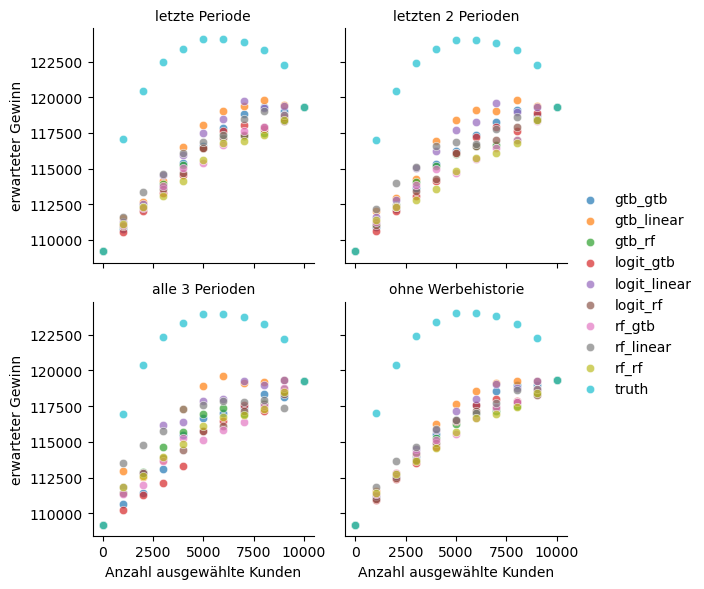

In [11]:
eval_all = pd.concat([e_1_periods, e_2_periods, e_3_periods, e_without])
eval_all = eval_all[eval_all["min_proms"]==eval_all["max_proms"]]
eval_all.loc[eval_all["models"] == "z_optimal", ["models"]] = "truth"

g = sns.FacetGrid(eval_all, col="predictors", col_wrap=2, hue="models", margin_titles=True)
g.map(sns.scatterplot, "min_proms", "exp_profit", alpha=.7)
g.add_legend(title="")
g.set_ylabels("erwarteter Gewinn")
g.set_xlabels("Anzahl ausgewählte Kunden")
g.set_titles(col_template="{col_name}") #col_template="Prädikatoren: {col_name}" 
filepath = model_set[0][0] + prefix +"vergleich_der_schaetzfunktionen_diff_praedikatoren.png"
g.savefig(filepath, bbox_inches="tight", format="png", dpi=300)
print(filepath)

In [25]:
e10000

,model_training_set_size,min_proms,max_proms,models,proms_sent,buys,orders_sum,profit,exp_profit,%_opt,predictors,row,col
0,10000,0,0,gtb_gtb,0.0,3643.2,284682.41,109552.42,109173.84,100.43,alle 3 Perioden,2,2
1,10000,0,0,gtb_linear,0.0,3656.9,286304.63,110240.24,109173.84,101.06,alle 3 Perioden,2,2
2,10000,0,0,gtb_rf,0.0,3649.7,285524.60,109915.01,109173.84,100.77,alle 3 Perioden,2,2
3,10000,0,0,logit_gtb,0.0,3596.8,281394.20,108325.90,109173.84,99.31,alle 3 Perioden,2,2
4,10000,0,0,logit_linear,0.0,3633.5,284343.89,109470.43,109173.84,100.36,alle 3 Perioden,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10000,10000,10000,logit_rf,10000.0,3845.2,327780.40,119283.40,119265.47,99.29,alle 3 Perioden,2,2
196,10000,10000,10000,rf_gtb,10000.0,3844.9,327538.09,119164.97,119265.47,99.19,alle 3 Perioden,2,2
197,10000,10000,10000,rf_linear,10000.0,3835.5,327431.09,119196.04,119265.47,99.22,alle 3 Perioden,2,2
198,10000,10000,10000,rf_rf,10000.0,3820.7,325337.54,118282.45,119265.47,98.46,alle 3 Perioden,2,2


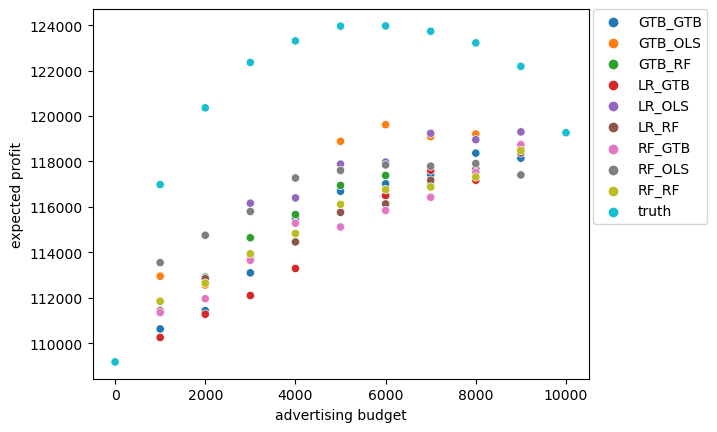

In [26]:
e = e_3_periods
e = e[e["model_training_set_size"]==10000]
e10000 = e[e["min_proms"]==e["max_proms"]]
e10000.loc[e10000["models"] == "gtb_gtb", ["models"]] = "GTB_GTB"
e10000.loc[e10000["models"] == "gtb_linear", ["models"]] = "GTB_OLS"
e10000.loc[e10000["models"] == "gtb_rf", ["models"]] = "GTB_RF"
e10000.loc[e10000["models"] == "rf_gtb", ["models"]] = "RF_GTB"
e10000.loc[e10000["models"] == "rf_linear", ["models"]] = "RF_OLS"
e10000.loc[e10000["models"] == "rf_rf", ["models"]] = "RF_RF"
e10000.loc[e10000["models"] == "logit_gtb", ["models"]] = "LR_GTB"
e10000.loc[e10000["models"] == "logit_linear", ["models"]] = "LR_OLS"
e10000.loc[e10000["models"] == "logit_rf", ["models"]] = "LR_RF"
e10000.loc[e10000["models"] == "z_optimal", ["models"]] = "truth"
sns_plot = sns.scatterplot(data=e10000, x="proms_sent", y="exp_profit", hue="models")

sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("expected profit")
plot.axes[0].set_xlabel("advertising budget")
plot.savefig(model_set[0][0] + prefix +"vergleich_der_schaetzfunktionen_feste_budgets.png", bbox_inches="tight", format="png", dpi=300)

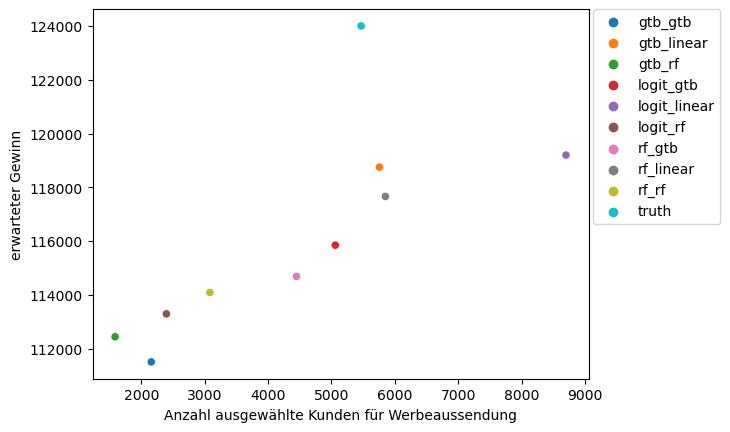

In [21]:
e10000 = e_3_periods[e_3_periods["model_training_set_size"]==10000]
e10000 = e10000.loc[ (e10000["min_proms"] == 0) & (e10000["max_proms"] == 10000), ["proms_sent", "exp_profit", "models"] ]
e10000.loc[e10000["models"] == "z_optimal", ["models"]] = "truth"

sns_plot = sns.scatterplot(data=e10000, x="proms_sent", y="exp_profit", hue="models")

sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden für Werbeaussendung")
plot.savefig(model_set[0][0] + prefix +"vergleich_der_schaetzfunktionen_ohne_budget.png", bbox_inches="tight", format="png", dpi=300)

In [ ]:
path = "auswahlpolitiken_eval/"

# Short Term Experiment
# use history and true probabilities and sizes

runs = 3
cust_count = 10000
first_cust_nr = 100000
fix_order_costs = 9.0
margin = 0.5
cost_per_prom = 1.0
max_proms = cust_count / 2
min_proms = cust_count / 2
promotions = [[0, 0], [1000, 1000], [2000, 2000], [3000, 3000], [4000, 4000], [5000, 5000], [6000, 6000], [7000, 7000], [8000, 8000], [9000, 9000], [10000, 10000]]
#promotions = [[0, 0], [100, 100], [200, 200], [300, 300], [400, 400], [500, 500], [600, 600], [700, 700], [800, 800], [900, 900], [1000, 1000]]
history = ["cust_nrs", "t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "t1_size", "t2_size", "t3_size"]
model_training_set_size = 10000

for run in range(1, runs + 1):        
    customers = func.create_cust_with_initial_behaviour(cust_count, first_cust_nr)
    orders_pre = customers
    orders_pre = orders_pre[history]
    for period in range(0, 12):
        orders_pre = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, int(cust_count / 2), int(cust_count / 2), period, "random")
    orders_pre = orders_pre[history]
    cust = orders_pre.merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
    cust = func.calc_true_expected_profit_for_opt_strategy(cust, fix_order_costs, margin, cost_per_prom)

    i = 0
    for prom in promotions:
        i += 1
        min_proms = prom[0]
        max_proms = prom[1]
        orders_q_value_10000 = cust.copy()
        orders_q_value_10 = cust.copy()
        orders_q_value_20 = cust.copy()
        orders_q_value_30 = cust.copy()
        orders_q_value_40 = cust.copy()
        orders_q_value_50 = cust.copy()
        orders_q_value_c = cust.copy()
        orders_q_value = cust.copy()
        orders_lp = cust.copy()
        orders_hprob = cust.copy()
        orders_hprofit = cust.copy()
        orders_hs = cust.copy()
        orders_lb = cust.copy()
        orders_nb = cust.copy()
        orders_rand = cust.copy()

        # send prom to lowest c where q value diff is positiv
        orders_q_value_c = func.send_prom_to_highest_kipppunkt(orders_q_value_c, max_proms, min_proms)
        orders_q_value_c = func.generate_orders(orders_q_value_c, margin, fix_order_costs, cost_per_prom)
        orders_q_value_c["profit"] = orders_q_value_c["size"] * margin - (orders_q_value_c["has_bought"] * fix_order_costs) - (orders_q_value_c["has_prom"] * cost_per_prom)

        # send prom to highest q value diff c=1
        orders_q_value = func.send_prom_to_highest_q_value_diff(orders_q_value, max_proms, min_proms)
        orders_q_value = func.generate_orders(orders_q_value, margin, fix_order_costs, cost_per_prom)
        orders_q_value["profit"] = orders_q_value["size"] * margin - (orders_q_value["has_bought"] * fix_order_costs) - (orders_q_value["has_prom"] * cost_per_prom)

        # send prom to highest q value diff c=10000
        orders_q_value_10000 = func.send_prom_to_highest_q_value_diff(orders_q_value_10000, max_proms, min_proms, 10000)
        orders_q_value_10000 = func.generate_orders(orders_q_value_10000, margin, fix_order_costs, cost_per_prom)
        orders_q_value_10000["profit"] = orders_q_value_10000["size"] * margin - (orders_q_value_10000["has_bought"] * fix_order_costs) - (orders_q_value_10000["has_prom"] * cost_per_prom)

        # send prom to highest q value diff c=10
        orders_q_value_10 = func.send_prom_to_highest_q_value_diff(orders_q_value_10, max_proms, min_proms, 10)
        orders_q_value_10 = func.generate_orders(orders_q_value_10, margin, fix_order_costs, cost_per_prom)
        orders_q_value_10["profit"] = orders_q_value_10["size"] * margin - (orders_q_value_10["has_bought"] * fix_order_costs) - (orders_q_value_10["has_prom"] * cost_per_prom)

        # send prom to highest q value diff c=20
        orders_q_value_20 = func.send_prom_to_highest_q_value_diff(orders_q_value_20, max_proms, min_proms, 20)
        orders_q_value_20 = func.generate_orders(orders_q_value_20, margin, fix_order_costs, cost_per_prom)
        orders_q_value_20["profit"] = orders_q_value_20["size"] * margin - (orders_q_value_20["has_bought"] * fix_order_costs) - (orders_q_value_20["has_prom"] * cost_per_prom)
        
        # send prom to highest q value diff c=30
        orders_q_value_30 = func.send_prom_to_highest_q_value_diff(orders_q_value_30, max_proms, min_proms, 30)
        orders_q_value_30 = func.generate_orders(orders_q_value_30, margin, fix_order_costs, cost_per_prom)
        orders_q_value_30["profit"] = orders_q_value_30["size"] * margin - (orders_q_value_30["has_bought"] * fix_order_costs) - (orders_q_value_30["has_prom"] * cost_per_prom)
        
        # send prom to highest q value diff c=40
        orders_q_value_40 = func.send_prom_to_highest_q_value_diff(orders_q_value_40, max_proms, min_proms, 40)
        orders_q_value_40 = func.generate_orders(orders_q_value_40, margin, fix_order_costs, cost_per_prom)
        orders_q_value_40["profit"] = orders_q_value_40["size"] * margin - (orders_q_value_40["has_bought"] * fix_order_costs) - (orders_q_value_40["has_prom"] * cost_per_prom)

        # send prom to highest q value diff c=50
        orders_q_value_50 = func.send_prom_to_highest_q_value_diff(orders_q_value_50, max_proms, min_proms, 50)
        orders_q_value_50 = func.generate_orders(orders_q_value_50, margin, fix_order_costs, cost_per_prom)
        orders_q_value_50["profit"] = orders_q_value_50["size"] * margin - (orders_q_value_50["has_bought"] * fix_order_costs) - (orders_q_value_50["has_prom"] * cost_per_prom)

        # send prom optimal (with lp)
        orders_lp = func.decide_prom_with_lp(orders_lp, max_proms, min_proms)    
        orders_lp = func.generate_orders(orders_lp, margin, fix_order_costs, cost_per_prom)
        orders_lp["profit"] = orders_lp["size"] * margin - (orders_lp["has_bought"] * fix_order_costs) - (orders_lp["has_prom"] * cost_per_prom)
        
        # send prom to highest probs
        orders_hprob = func.send_prom_to_hprob(orders_hprob, max_proms, min_proms)
        orders_hprob = func.generate_orders(orders_hprob, margin, fix_order_costs, cost_per_prom)
        orders_hprob["profit"] = orders_hprob["size"] * margin - (orders_hprob["has_bought"] * fix_order_costs) - (orders_hprob["has_prom"] * cost_per_prom)

        # send prom to highest expected profit
        orders_hprofit = func.send_prom_to_hprofit(orders_hprofit, max_proms, min_proms)
        orders_hprofit = func.generate_orders(orders_hprofit, margin, fix_order_costs, cost_per_prom)
        orders_hprofit["profit"] = orders_hprofit["size"] * margin - (orders_hprofit["has_bought"] * fix_order_costs) - (orders_hprofit["has_prom"] * cost_per_prom)

        # send prom to highest sizes
        orders_hs = func.send_prom_to_hs(orders_hs, max_proms, min_proms)
        orders_hs = func.generate_orders(orders_hs, margin, fix_order_costs, cost_per_prom)
        orders_hs["profit"] = orders_hs["size"] * margin - (orders_hs["has_bought"] * fix_order_costs) - (orders_hs["has_prom"] * cost_per_prom)

        # send prom to last buyers
        orders_lb = func.send_prom_to_lb(orders_lb, max_proms, min_proms)
        orders_lb = func.generate_orders(orders_lb, margin, fix_order_costs, cost_per_prom)
        orders_lb["profit"] = orders_lb["size"] * margin - (orders_lb["has_bought"] * fix_order_costs) - (orders_lb["has_prom"] * cost_per_prom)

        # send prom to non buyers
        orders_nb = func.send_prom_to_nb(orders_nb, max_proms, min_proms)
        orders_nb = func.generate_orders(orders_nb, margin, fix_order_costs, cost_per_prom)
        orders_nb["profit"] = orders_nb["size"] * margin - (orders_nb["has_bought"] * fix_order_costs) - (orders_nb["has_prom"] * cost_per_prom)

        # send prom random
        orders_rand = func.send_prom_to_random(orders_rand, max_proms, min_proms)
        orders_rand = func.generate_orders(orders_rand, margin, fix_order_costs, cost_per_prom)
        orders_rand["profit"] = orders_rand["size"] * margin - (orders_rand["has_bought"] * fix_order_costs) - (orders_rand["has_prom"] * cost_per_prom)

        eval_run = pd.concat([
            func.get_kpis(orders_q_value_c, "q_value_lowest_c"),
            func.get_kpis(orders_q_value_10, "q_value_diff_10"),
            func.get_kpis(orders_q_value_20, "q_value_diff_20"),
            func.get_kpis(orders_q_value_30, "q_value_diff_30"),
            func.get_kpis(orders_q_value_40, "q_value_diff_40"),
            func.get_kpis(orders_q_value_50, "q_value_diff_50"),
            func.get_kpis(orders_q_value_10000, "q_value_diff_10000"),
            func.get_kpis(orders_q_value, "q_value_diff"),
            func.get_kpis(orders_lp, "linear_problem"),
            func.get_kpis(orders_hprob, "highest_prob"),
            func.get_kpis(orders_hprofit, "highest_profit"),
            func.get_kpis(orders_hs, "highest_sizes"),
            func.get_kpis(orders_lb, "last_buyers"),
            func.get_kpis(orders_nb, "no_buyers"),
            func.get_kpis(orders_rand, "random_choice")
            ])

        eval_run["run"] = run
        eval_run["min_proms"] = min_proms
        eval_run["max_proms"] = max_proms
        eval_run["model_training_set_size"] = model_training_set_size
        if run == 1 and i == 1:
            eval_runs = eval_run
        else:
            eval_runs = pd.concat([eval_runs, eval_run])
            
eval_runs.to_csv(path + prefix + "simulation_short_term_compare_decision_options_all.csv", sep=';', decimal=',')
eval_runs.head()

,models,proms_sent,buys,orders_sum,profit,exp_profit,run,min_proms,max_proms,model_training_set_size
0,q_value_lowest_c,0,3660,298126.7,116123.4,114409.8,1,0,0,10000
0,q_value_diff_10,0,3591,291110.2,113236.1,114409.8,1,0,0,10000
0,q_value_diff_20,0,3631,291483.2,113062.6,114409.8,1,0,0,10000
0,q_value_diff_30,0,3568,289060.3,112418.1,114409.8,1,0,0,10000
0,q_value_diff_40,0,3679,298224.5,116001.3,114409.8,1,0,0,10000


In [30]:
path = "auswahlpolitiken_eval/"
prefix = "23_02_14_"
e = pd.read_csv(path + prefix + "simulation_short_term_compare_decision_options_all.csv", sep=';', decimal=',')
e = e.drop(["Unnamed: 0"], axis=1)
e = e.drop(["run"], axis=1)
e = e.groupby(["min_proms", "max_proms", "models"]).mean().round(2)
e = e.reset_index()
e["%_linear_problem"] = (e.apply(lambda row: (row["profit"] / func.get_optimal_profit(e, row["model_training_set_size"], row["min_proms"], row["max_proms"], "linear_problem") * 100.0), axis=1)).round(2) 
e.to_csv(path + prefix + "simulation_short_term_compare_decision_options_all_%_linear_problem.csv", sep=';', decimal=',')
e["proms_sent"] = e["proms_sent"].astype(int)
e.head()

,min_proms,max_proms,models,proms_sent,buys,orders_sum,profit,exp_profit,model_training_set_size,%_linear_problem
0,0,0,highest_prob,0,3633.2,282871.39,108736.89,109035.02,10000.0,99.30
1,0,0,highest_profit,0,3635.7,283319.72,108938.55,109035.02,10000.0,99.49
2,0,0,highest_sizes,0,3615.5,281683.53,108302.27,109035.02,10000.0,98.91
3,0,0,last_buyers,0,3663.3,285397.11,109728.86,109035.02,10000.0,100.21
4,0,0,linear_problem,0,3645.1,284612.99,109500.59,109035.02,10000.0,100.00


In [13]:
e["%_linear_problem"] = e["%_linear_problem"].astype(float)
e[(e["proms_sent"] > 2000) & (e["proms_sent"] < 8000)][["models", "%_linear_problem"]].groupby("models").mean()

,%_linear_problem
models,
highest_prob,95.742
highest_profit,96.438
highest_sizes,94.608
last_buyers,91.632
linear_problem,100.000
no_buyers,93.424
q_value_diff,94.382
q_value_diff_10,94.296
q_value_diff_10000,95.332


In [14]:
eval_q_value = e[e["models"].isin(["q_value_diff", "q_value_diff_10", "q_value_diff_20", "q_value_diff_30", "q_value_diff_40", "q_value_diff_50", "q_value_diff_10000", "q_value_lowest_c", "linear_problem"])]
eval_q_value[(eval_q_value["proms_sent"] > 2000) & (eval_q_value["proms_sent"] < 8000)][["models", "proms_sent", "%_linear_problem"]].head() #.groupby("models").mean()

,models,proms_sent,%_linear_problem
49,linear_problem,3000,100.00
51,q_value_diff,3000,93.49
52,q_value_diff_10,3000,93.79
53,q_value_diff_10000,3000,95.77
54,q_value_diff_20,3000,93.77


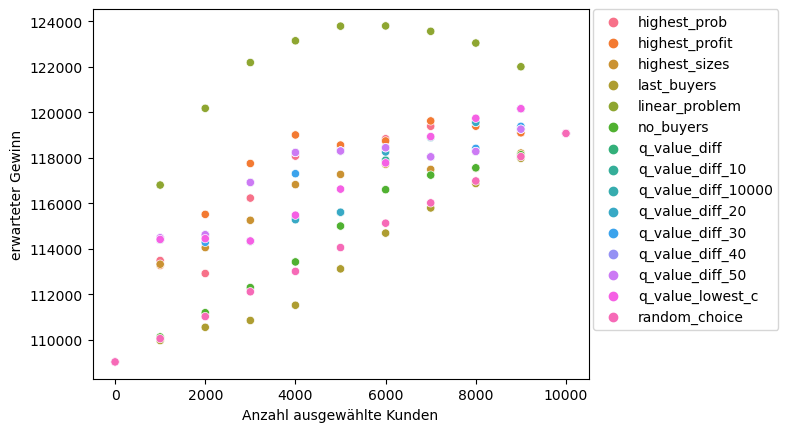

In [15]:
sns_plot = sns.scatterplot(data=e, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("expected profit")
plot.axes[0].set_xlabel("advertising budget")
plot.savefig(path + prefix+"vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

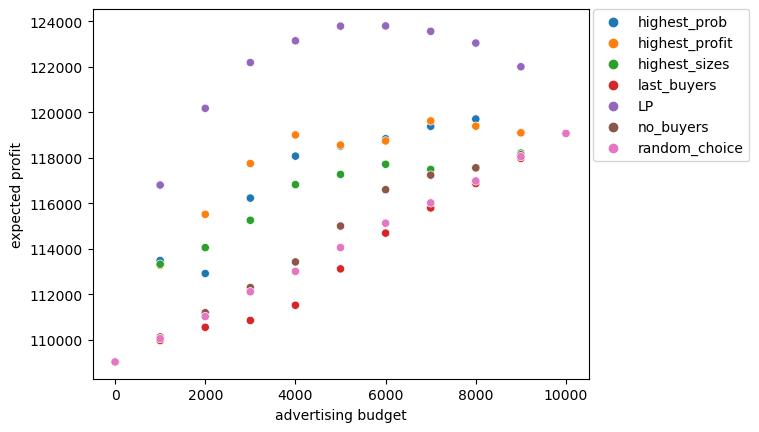

In [32]:
eval_chosen_models = e[e["models"].isin(['highest_prob', 'highest_profit', 'highest_sizes', 'last_buyers',
       'linear_problem', 'no_buyers', "random_choice" ])] # 'q_value_diff', "q_value_lowest_c",

eval_chosen_models.loc[eval_chosen_models["models"] == "linear_problem", ["models"]] = "LP"
sns_plot = sns.scatterplot(data=eval_chosen_models, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("expected profit")
plot.axes[0].set_xlabel("advertising budget")
plot.savefig(path + prefix + "reduziert_vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

In [ ]:
eval_q_value = e[e["models"].isin(["q_value_diff", "q_value_diff_10", "q_value_diff_20", "q_value_diff_30", "q_value_diff_40", "q_value_diff_50", "q_value_diff_10000", "q_value_lowest_c", "linear_problem"])]
sns_plot = sns.scatterplot(data=eval_q_value, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden")
plot.savefig(path + prefix + "dynamic_opt_vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

In [ ]:
eval_q_value =  e[e["models"].isin(["q_value_diff", "q_value_diff_10", "q_value_diff_20", "q_value_diff_30", "q_value_diff_40", "q_value_diff_50", "q_value_diff_10000", "q_value_lowest_c", "linear_problem"])]
eval_q_value = eval_q_value[(eval_q_value["proms_sent"] > 2000) & (eval_q_value["proms_sent"] < 8000)]
sns_plot = sns.barplot(data=eval_q_value, x="proms_sent", y="exp_profit", hue="models")
sns_plot.set_ylim(110000, 124000)
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn in Folgeperiode")
plot.axes[0].set_xlabel("Werbebudgets - Anzahl ausgewählte Kunden pro Periode")
plot.savefig(path +prefix+"barchart_dynamic_program_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

In [ ]:
eval_chosen_models = e[e["models"].isin(['highest_prob', 'highest_profit', 'highest_sizes', 'last_buyers',
       'linear_problem', 'no_buyers', 'q_value_diff_c1', "q_value_diff_c1", "random_choice" ])]
eval_chosen_models = eval_chosen_models[(eval_chosen_models["proms_sent"] > 2000) & (eval_chosen_models["proms_sent"] < 8000)]
sns_plot = sns.barplot(data=eval_chosen_models, x="proms_sent", y="exp_profit", hue="models")
sns_plot.set_ylim(110000, 124000)
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn 24 Perioden")
plot.axes[0].set_xlabel("Werbebudgets - Anzahl ausgewählte Kunden pro Periode")
plot.savefig(path +prefix+"barchart_reduziert_vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

In [ ]:
sns_plot = sns.scatterplot(data=e, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden")
plot.savefig(path + prefix+"vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

--- run start, promotions start, start, , 0, 0 ---
--- run 1, promotions 0, start, , 12217, 12216 ---
--- run 1, promotions 0, q_value_highest_c, , 33016, 20797 ---
--- run 1, promotions 0, q_values_c1, , 53663, 20645 ---
--- run 1, promotions 0, q_values_c10000, , 74401, 20736 ---
--- run 1, promotions 0, q_values_c10, , 100872, 26470 ---
--- run 1, promotions 0, q_values_c20, , 123585, 22711 ---
--- run 1, promotions 0, q_values_c30, , 153469, 29883 ---
--- run 1, promotions 0, q_values_c40, , 174408, 20938 ---
--- run 1, promotions 0, q_values_c50, , 195285, 20876 ---
--- run 1, promotions 0, lp, , 233166, 37880 ---
--- run 1, promotions 0, hprob, , 254036, 20869 ---
--- run 1, promotions 0, hsize, , 274591, 20553 ---
--- run 1, promotions 0, hprofit, , 295416, 20824 ---
--- run 1, promotions 0, last_buyers, , 316304, 20886 ---
--- run 1, promotions 0, non_buyers, , 336978, 20672 ---
--- run 1, promotions 0, random, , 360718, 23739 ---
--- run 1, promotions 1000, start, , 360719, 0 

,models,proms_sent,buys,orders_sum,profit,exp_profit,period,run,min_proms,max_proms,model_training_set_size
0,q_value_highest_c,0,3600,289289.2,112244.6,112081.3,1,1,0,0,10000
0,q_value_highest_c,0,3823,317936.1,124561.1,123100.9,2,1,0,0,10000
0,q_value_highest_c,0,3133,290156.0,116881.0,115315.2,3,1,0,0,10000
0,q_value_highest_c,0,2136,199396.0,80474.0,79880.9,4,1,0,0,10000
0,q_value_highest_c,0,2125,192296.5,77023.2,76315.4,5,1,0,0,10000
...,...,...,...,...,...,...,...,...,...,...,...
0,random_choice,10000,6691,517357.1,188459.6,190457.5,20,3,10000,10000,10000
0,random_choice,10000,6931,528621.6,191931.8,190089.2,21,3,10000,10000,10000
0,random_choice,10000,6743,522488.4,190557.2,191907.8,22,3,10000,10000,10000
0,random_choice,10000,6796,519492.5,188582.3,189762.4,23,3,10000,10000,10000


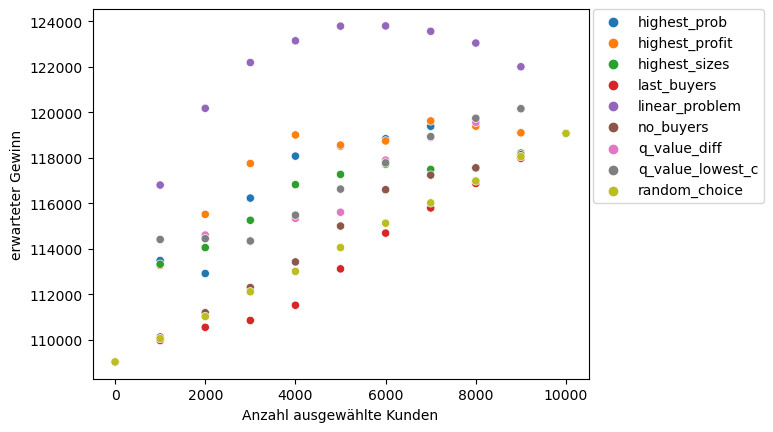

In [43]:
eval_chosen_models = e[e["models"].isin(['highest_prob', 'highest_profit', 'highest_sizes', 'last_buyers',
       'linear_problem', 'no_buyers', 'q_value_diff', "q_value_lowest_c", "random_choice" ])]
sns_plot = sns.scatterplot(data=eval_chosen_models, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden")
plot.savefig(path + prefix + "reduziert_vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

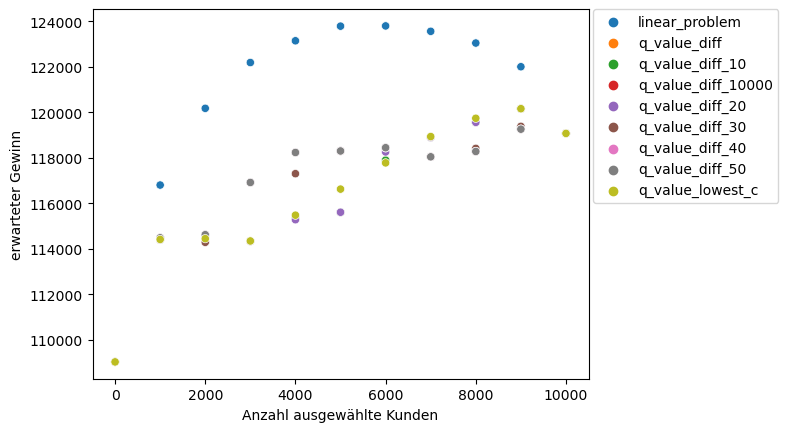

In [44]:
eval_q_value = e[e["models"].isin(["q_value_diff", "q_value_diff_10", "q_value_diff_20", "q_value_diff_30", "q_value_diff_40", "q_value_diff_50", "q_value_diff_10000", "q_value_lowest_c", "linear_problem"])]
sns_plot = sns.scatterplot(data=eval_q_value, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden")
plot.savefig(path + prefix + "dynamic_opt_vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

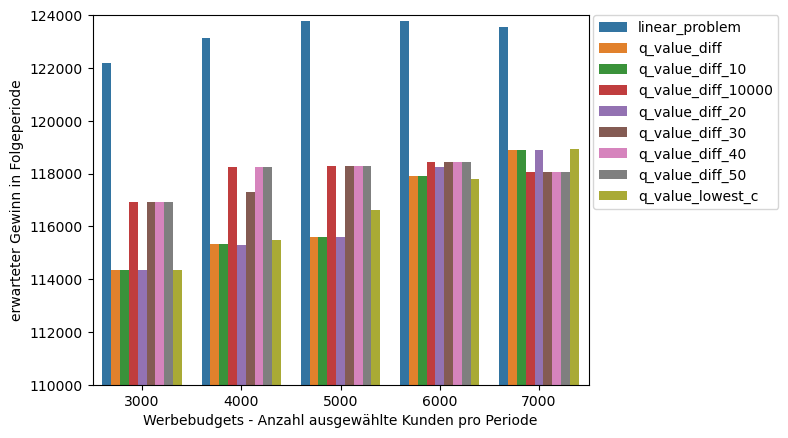

In [45]:
eval_q_value =  e[e["models"].isin(["q_value_diff", "q_value_diff_10", "q_value_diff_20", "q_value_diff_30", "q_value_diff_40", "q_value_diff_50", "q_value_diff_10000", "q_value_lowest_c", "linear_problem"])]
eval_q_value = eval_q_value[(eval_q_value["proms_sent"] > 2000) & (eval_q_value["proms_sent"] < 8000)]
sns_plot = sns.barplot(data=eval_q_value, x="proms_sent", y="exp_profit", hue="models")
sns_plot.set_ylim(110000, 124000)
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn in Folgeperiode")
plot.axes[0].set_xlabel("Werbebudgets - Anzahl ausgewählte Kunden pro Periode")
plot.savefig(path +prefix+"barchart_dynamic_program_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

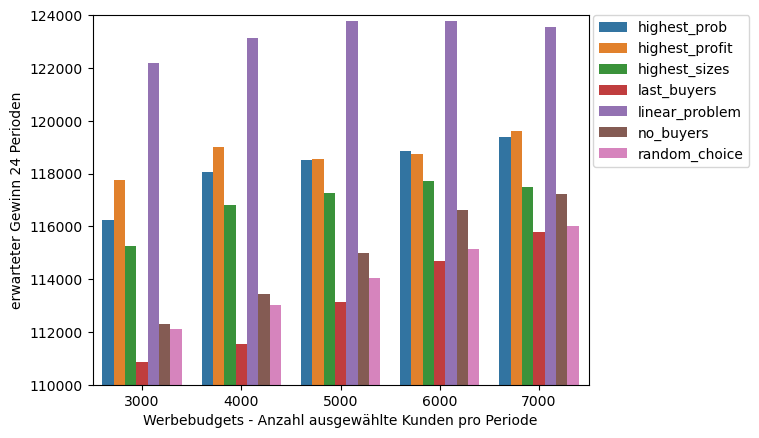

In [47]:
eval_chosen_models = e[e["models"].isin(['highest_prob', 'highest_profit', 'highest_sizes', 'last_buyers',
       'linear_problem', 'no_buyers', 'q_value_diff_c1', "q_value_diff_c1", "random_choice" ])]
eval_chosen_models = eval_chosen_models[(eval_chosen_models["proms_sent"] > 2000) & (eval_chosen_models["proms_sent"] < 8000)]
sns_plot = sns.barplot(data=eval_chosen_models, x="proms_sent", y="exp_profit", hue="models")
sns_plot.set_ylim(110000, 124000)
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("erwarteter Gewinn 24 Perioden")
plot.axes[0].set_xlabel("Werbebudgets - Anzahl ausgewählte Kunden pro Periode")
plot.savefig(path +prefix+"barchart_reduziert_vergleich_der_auswahlpolitiken_1_periode.png", bbox_inches="tight", format="png", dpi=300)

In [12]:
# Long Term Evaluation
runs = 3 
cust_count = 10000 
first_cust_nr = 100000
fix_order_costs = 9.0
margin = 0.5
cost_per_prom = 1.0
periods = 24 
promotions = [[0, 0], [1000, 1000], [2000, 2000], [3000, 3000], [4000, 4000], [5000, 5000], [6000, 6000], [7000, 7000], [8000, 8000], [9000, 9000], [10000, 10000]]
#promotions = [[0, 0], [100, 100], [200, 200], [300, 300], [400, 400], [500, 500], [600, 600], [700, 700], [800, 800], [900, 900], [1000, 1000]]
history = ["cust_nrs", "t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "t1_size", "t2_size", "t3_size"]

log_filepath = path + "performance_log_"+prefix+"_simulation_long_term_"+str(periods)+"_periods.csv"
info = '' 
print_out = True
write_header = False
start_time = time.time_ns()
last_step_time = time.time_ns()
eval_runs_exists = False

last_step_time = func.write_performance_log(log_filepath, 'start', 'start', 'start', start_time, last_step_time, 0, info, print_out, True)
for run in range(1, runs + 1):        
    customers = func.create_cust_with_initial_behaviour(cust_count, first_cust_nr)
    orders_pre = customers
    orders_pre = orders_pre[history]
    for period in range(0, 12):
        orders_pre = func.simulate_period(orders_pre, cust_behaviour, fix_order_costs, margin, cost_per_prom, int(cust_count/2) , int(cust_count/2), period, "random")
    cust = orders_pre[history]

    for prom in promotions:
        min_proms = prom[0]
        max_proms = prom[1]

        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'start', start_time, last_step_time, 0, info, print_out, False)
        logfilepath = path + prefix + "dp_policy_simulation_log.csv"
        orders_balanced_c = cust.copy()
        for period in range(1, periods+1):
            orders_balanced_c = orders_balanced_c[history] #.merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_balanced_c_1 = dp.decide_with_dp(cust_behaviour, orders_balanced_c, max_proms, logfilepath) #func.send_prom_to_highest_kipppunkt(orders_balanced_c, max_proms, min_proms)
            orders_balanced_c = func.generate_orders(orders_balanced_c_1, margin, fix_order_costs, cost_per_prom)
            orders_balanced_c["profit"] = orders_balanced_c["size"] * margin - (orders_balanced_c["has_bought"] * fix_order_costs) - (orders_balanced_c["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_balanced_c, "c_balanced")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_balanced_c)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'c_dp_balanced_cost', start_time, last_step_time, 0, info, print_out, False)

        orders_umkippheuristik = cust.copy()
        for period in range(1, periods+1):
            # send prom to umkippheuristik
            orders_umkippheuristik = orders_umkippheuristik[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_umkippheuristik = func.send_prom_to_highest_kipppunkt(orders_umkippheuristik, max_proms, min_proms)
            orders_umkippheuristik = func.generate_orders(orders_umkippheuristik, margin, fix_order_costs, cost_per_prom)
            orders_umkippheuristik["profit"] = orders_umkippheuristik["size"] * margin - (orders_umkippheuristik["has_bought"] * fix_order_costs) - (orders_umkippheuristik["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_umkippheuristik, "c_umkippheuristik")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_umkippheuristik)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'c_umkippheuristik', start_time, last_step_time, 0, info, print_out, False)

        orders_q_value_c1 = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest q value diff
            orders_q_value_c1 = orders_q_value_c1[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_q_value_c1 = func.send_prom_to_highest_q_value_diff(orders_q_value_c1, max_proms, min_proms)
            orders_q_value_c1 = func.generate_orders(orders_q_value_c1, margin, fix_order_costs, cost_per_prom)
            orders_q_value_c1["profit"] = orders_q_value_c1["size"] * margin - (orders_q_value_c1["has_bought"] * fix_order_costs) - (orders_q_value_c1["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_q_value_c1, "q_value_diff_c1")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_q_value_c1)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'q_values_c1', start_time, last_step_time, 0, info, print_out, False)

        orders_q_value_c10000 = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest q value diff
            orders_q_value_c10000 = orders_q_value_c10000[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_q_value_c10000 = func.send_prom_to_highest_q_value_diff(orders_q_value_c10000, max_proms, min_proms, c=10000)
            orders_q_value_c10000 = func.generate_orders(orders_q_value_c10000, margin, fix_order_costs, cost_per_prom)
            orders_q_value_c10000["profit"] = orders_q_value_c10000["size"] * margin - (orders_q_value_c10000["has_bought"] * fix_order_costs) - (orders_q_value_c10000["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_q_value_c10000, "q_value_diff_c10000")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_q_value_c10000)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'q_values_c10000', start_time, last_step_time, 0, info, print_out, False)

        orders_q_value_c10 = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest q value diff
            orders_q_value_c10 = orders_q_value_c10[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_q_value_c10 = func.send_prom_to_highest_q_value_diff(orders_q_value_c10, max_proms, min_proms, c=10)
            orders_q_value_c10 = func.generate_orders(orders_q_value_c10, margin, fix_order_costs, cost_per_prom)
            orders_q_value_c10["profit"] = orders_q_value_c10["size"] * margin - (orders_q_value_c10["has_bought"] * fix_order_costs) - (orders_q_value_c10["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_q_value_c10, "q_value_diff_c10")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_q_value_c10)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'q_values_c10', start_time, last_step_time, 0, info, print_out, False)

        orders_q_value_20 = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest q value diff
            orders_q_value_20 = orders_q_value_20[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_q_value_20 = func.send_prom_to_highest_q_value_diff(orders_q_value_20, max_proms, min_proms, c=20)
            orders_q_value_20 = func.generate_orders(orders_q_value_20, margin, fix_order_costs, cost_per_prom)
            orders_q_value_20["profit"] = orders_q_value_20["size"] * margin - (orders_q_value_20["has_bought"] * fix_order_costs) - (orders_q_value_20["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_q_value_20, "q_value_diff_c20")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_q_value_20)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'q_values_c20', start_time, last_step_time, 0, info, print_out, False)

        orders_q_value_30 = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest q value diff
            orders_q_value_30 = orders_q_value_30[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_q_value_30 = func.send_prom_to_highest_q_value_diff(orders_q_value_30, max_proms, min_proms, c=30)
            orders_q_value_30 = func.generate_orders(orders_q_value_30, margin, fix_order_costs, cost_per_prom)
            orders_q_value_30["profit"] = orders_q_value_30["size"] * margin - (orders_q_value_30["has_bought"] * fix_order_costs) - (orders_q_value_30["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_q_value_30, "q_value_diff_c30")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_q_value_30)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'q_values_c30', start_time, last_step_time, 0, info, print_out, False)

        orders_q_value_40 = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest q value diff
            orders_q_value_40 = orders_q_value_40[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_q_value_40 = func.send_prom_to_highest_q_value_diff(orders_q_value_40, max_proms, min_proms, c=40)
            orders_q_value_40 = func.generate_orders(orders_q_value_40, margin, fix_order_costs, cost_per_prom)
            orders_q_value_40["profit"] = orders_q_value_40["size"] * margin - (orders_q_value_40["has_bought"] * fix_order_costs) - (orders_q_value_40["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_q_value_40, "q_value_diff_c40")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_q_value_40)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'q_values_c40', start_time, last_step_time, 0, info, print_out, False)
                
        orders_q_value_50 = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest q value diff
            orders_q_value_50 = orders_q_value_50[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_q_value_50 = func.send_prom_to_highest_q_value_diff(orders_q_value_50, max_proms, min_proms, c=50)
            orders_q_value_50 = func.generate_orders(orders_q_value_50, margin, fix_order_costs, cost_per_prom)
            orders_q_value_50["profit"] = orders_q_value_50["size"] * margin - (orders_q_value_50["has_bought"] * fix_order_costs) - (orders_q_value_50["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_q_value_50, "q_value_diff_c50")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_q_value_50)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'q_values_c50', start_time, last_step_time, 0, info, print_out, False)

        orders_lp = cust.copy()
        for period in range(1, periods+1):
            # send prom optimal (with lp)
            orders_lp = orders_lp[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_lp = func.calc_true_expected_profit_for_opt_strategy(orders_lp, fix_order_costs, margin, cost_per_prom)
            orders_lp = func.decide_prom_with_lp(orders_lp, max_proms, min_proms)
            orders_lp = func.generate_orders(orders_lp, margin, fix_order_costs, cost_per_prom)
            orders_lp["profit"] = orders_lp["size"] * margin - (orders_lp["has_bought"] * fix_order_costs) - (orders_lp["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_lp, "linear_problem")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_lp)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'lp', start_time, last_step_time, 0, info, print_out, False)

        orders_hprob = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest probs
            orders_hprob = orders_hprob[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_hprob = func.send_prom_to_hprob(orders_hprob, max_proms, min_proms)
            orders_hprob = func.generate_orders(orders_hprob, margin, fix_order_costs, cost_per_prom)
            orders_hprob["profit"] = orders_hprob["size"] * margin - (orders_hprob["has_bought"] * fix_order_costs) - (orders_hprob["has_prom"] * cost_per_prom)
            
            eval_run = pd.concat([func.get_kpis(orders_hprob, "highest_prob")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_hprob)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'hprob', start_time, last_step_time, 0, info, print_out, False)

        orders_hs = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest sizes
            orders_hs = orders_hs[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_hs = func.send_prom_to_hs(orders_hs, max_proms, min_proms)
            orders_hs = func.generate_orders(orders_hs, margin, fix_order_costs, cost_per_prom)
            orders_hs["profit"] = orders_hs["size"] * margin - (orders_hs["has_bought"] * fix_order_costs) - (orders_hs["has_prom"] * cost_per_prom)

            eval_run = pd.concat([func.get_kpis(orders_hs, "highest_sizes")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_hs)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'hsize', start_time, last_step_time, 0, info, print_out, False)

        orders_hprofit = cust.copy()
        for period in range(1, periods+1):
            # send prom to highest profit
            orders_hprofit = orders_hprofit[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_hprofit = func.calc_true_expected_profit_for_opt_strategy(orders_hprofit, fix_order_costs, margin, cost_per_prom)
            orders_hprofit = func.send_prom_to_hprofit(orders_hprofit, max_proms, min_proms)
            orders_hprofit = func.generate_orders(orders_hprofit, margin, fix_order_costs, cost_per_prom)
            orders_hprofit["profit"] = orders_hprofit["size"] * margin - (orders_hprofit["has_bought"] * fix_order_costs) - (orders_hprofit["has_prom"] * cost_per_prom)

            eval_run = pd.concat([func.get_kpis(orders_hprofit, "highest_profit")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_hprofit)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'hprofit', start_time, last_step_time, 0, info, print_out, False)
        
        orders_lb = cust.copy()
        for period in range(1, periods+1):
            # send prom to last buyers
            orders_lb = orders_lb[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_lb = func.send_prom_to_lb(orders_lb, max_proms, min_proms)
            orders_lb = func.generate_orders(orders_lb, margin, fix_order_costs, cost_per_prom)
            orders_lb["profit"] = orders_lb["size"] * margin - (orders_lb["has_bought"] * fix_order_costs) - (orders_lb["has_prom"] * cost_per_prom)

            eval_run = pd.concat([func.get_kpis(orders_lb, "last_buyers")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_lb)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'last_buyers', start_time, last_step_time, 0, info, print_out, False)

        orders_nb = cust.copy()
        for period in range(1, periods+1):
            # send prom to non buyers
            orders_nb = orders_nb[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_nb = func.send_prom_to_nb(orders_nb, max_proms, min_proms)
            orders_nb = func.generate_orders(orders_nb, margin, fix_order_costs, cost_per_prom)
            orders_nb["profit"] = orders_nb["size"] * margin - (orders_nb["has_bought"] * fix_order_costs) - (orders_nb["has_prom"] * cost_per_prom)

            eval_run = pd.concat([func.get_kpis(orders_nb, "no_buyers")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_nb)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'non_buyers', start_time, last_step_time, 0, info, print_out, False)

        orders_rand = cust.copy()
        for period in range(1, periods+1):
            # send prom random
            orders_rand = orders_rand[history].merge(cust_behaviour, how='left', on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], suffixes=('_x', ''))
            orders_rand = func.send_prom_to_random(orders_rand, max_proms, min_proms)
            orders_rand = func.generate_orders(orders_rand, margin, fix_order_costs, cost_per_prom)
            orders_rand["profit"] = orders_rand["size"] * margin - (orders_rand["has_bought"] * fix_order_costs) - (orders_rand["has_prom"] * cost_per_prom)

            eval_run = pd.concat([func.get_kpis(orders_rand, "random_choice")])
            eval_run["period"] = period
            eval_run["run"] = run
            eval_run["min_proms"] = min_proms
            eval_run["max_proms"] = max_proms
            if eval_runs_exists:
                eval_runs = pd.concat([eval_runs, eval_run])
            else:
                eval_runs = eval_run
                eval_runs_exists = True
        del(orders_rand)
        gc.collect()
        last_step_time = func.write_performance_log(log_filepath, run, max_proms, 'random', start_time, last_step_time, 0, info, print_out, False)

eval_runs.to_csv(path + prefix + "simulation_long_term_"+str(periods)+"_periods.csv", sep=';', decimal=',')
print(path + prefix + "simulation_long_term_"+str(periods)+"_periods.csv")
eval_runs

--- run start, promotions start, start, , 0, 0 ---
--- run 1, promotions 0, start, , 15750, 15748 ---
Anzahl Kunden mit Werbung 0 bei Kosten von 0 in Iteration 0
Anzahl Kunden mit Werbung 10000.0 bei Kosten von 0.1 in Iteration 1
Anzahl Kunden mit Werbung 0.0 bei Kosten von 50.05 in Iteration 2
Min C 0.1 Max C 100.0 Kosten 50.05
Anzahl Kunden mit Werbung 0 bei Kosten von 0 in Iteration 0
Anzahl Kunden mit Werbung 10000.0 bei Kosten von 0.1 in Iteration 1
Anzahl Kunden mit Werbung 0.0 bei Kosten von 50.05 in Iteration 2
Min C 0.1 Max C 100.0 Kosten 50.05
Anzahl Kunden mit Werbung 0 bei Kosten von 0 in Iteration 0
Anzahl Kunden mit Werbung 10000.0 bei Kosten von 0.1 in Iteration 1
Anzahl Kunden mit Werbung 0.0 bei Kosten von 50.05 in Iteration 2
Min C 0.1 Max C 100.0 Kosten 50.05
Anzahl Kunden mit Werbung 0 bei Kosten von 0 in Iteration 0
Anzahl Kunden mit Werbung 10000.0 bei Kosten von 0.1 in Iteration 1
Anzahl Kunden mit Werbung 0.0 bei Kosten von 50.05 in Iteration 2
Min C 0.1 Max C 1

,models,proms_sent,buys,orders_sum,profit,exp_profit,period,run,min_proms,max_proms
0,c_balanced,0,3627,284147.2,109430.6,109258.2,1,1,0,0
0,c_balanced,0,3733,263468.3,98137.1,98489.2,2,1,0,0
0,c_balanced,0,3103,203506.3,73826.1,73941.3,3,1,0,0
0,c_balanced,0,2201,158400.6,59391.3,57581.1,4,1,0,0
0,c_balanced,0,2120,155440.7,58640.3,56856.3,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
0,random_choice,10000,7087,725845.5,289139.8,288736.4,20,3,10000,10000
0,random_choice,10000,7128,729564.2,290630.1,287656.5,21,3,10000,10000
0,random_choice,10000,7074,723084.5,287876.2,287007.8,22,3,10000,10000
0,random_choice,10000,7027,717988.2,285751.1,287330.8,23,3,10000,10000


In [25]:
#orders_balanced_c_1.to_csv(path + prefix + "orders_balanced_c_1_"+str(periods)+"_periods.csv", sep=';', decimal=',')
orders_balanced_c_1["Q_1-Q_0"] = orders_balanced_c_1["Q_1"] - orders_balanced_c_1["Q_0"]
orders_balanced_c_1[["Q_1", "Q_0", "Q_1-Q_0", "q_value_prom_c20", "q_value_no_prom_c20", "q_value_diff_c20"]]

,Q_1,Q_0,Q_1-Q_0,q_value_prom_c20,q_value_no_prom_c20,q_value_diff_c20
0,2091.503781,2042.387402,49.116379,1946.807,1919.618,27.189
1,2089.784118,2037.201614,52.582504,1945.088,1913.799,31.289
2,2090.065726,2040.116011,49.949715,1945.369,1915.319,30.050
3,2090.065726,2040.116011,49.949715,1945.369,1915.319,30.050
4,2091.503781,2042.387402,49.116379,1946.807,1919.618,27.189
...,...,...,...,...,...,...
9995,2089.784118,2037.201614,52.582504,1945.088,1913.799,31.289
9996,2098.032780,2036.570563,61.462217,1953.336,1913.516,39.820
9997,2091.503781,2042.387402,49.116379,1946.807,1919.618,27.189
9998,2091.503781,2042.387402,49.116379,1946.807,1919.618,27.189


In [35]:
periods = 24
prefix = '23_02_14_'
path = "auswahlpolitiken_eval/"
#eval_runs.to_csv(path + prefix + "simulation_long_term_"+str(periods)+"_periods.csv", sep=';', decimal=',')
e = pd.read_csv(path + prefix + "simulation_long_term_"+str(periods)+"_periods.csv", sep=';', decimal=',')

In [36]:
e = pd.read_csv(path +prefix + "simulation_long_term_"+str(periods)+"_periods.csv", sep=';', decimal=',')
e = e.drop(["Unnamed: 0"], axis=1)
e = e.drop(["run"], axis=1)
e = e.drop(["period"], axis=1)
e = e.groupby(["min_proms", "max_proms", "models"]).mean().round(2)
e = e.reset_index()
e["%_linear_problem"] = (e.apply(lambda row: (row["profit"] / func.get_optimal_profit(e, 'unset', row["min_proms"], row["max_proms"], "linear_problem") * 100.0), axis=1)).round(2)
e.to_csv(path + prefix + "simulation_long_term_"+str(periods)+"_periods_%_linear_problem.csv", sep=';', decimal=',')
e["proms_sent"] = e["proms_sent"].astype(int)
e.loc[e["models"] == "c_umkippheuristik", "models"] = "c_threshold"
e.head()

,min_proms,max_proms,models,proms_sent,buys,orders_sum,profit,exp_profit,%_linear_problem
0,0,0,c_balanced,0,1803.35,137723.86,52631.81,52591.81,100.02
1,0,0,c_threshold,0,1804.92,137876.75,52694.13,52603.59,100.14
2,0,0,highest_prob,0,1804.75,137820.02,52667.26,52588.84,100.09
3,0,0,highest_profit,0,1806.82,138119.60,52798.42,52618.23,100.34
4,0,0,highest_sizes,0,1806.01,137947.86,52719.80,52604.62,100.19


In [37]:
red = e[(e["proms_sent"] > 2000) & (e["proms_sent"] < 8000)]
red = red[red["models"].isin(["q_value_diff_c1", "linear_problem"])]
red

,min_proms,max_proms,models,proms_sent,buys,orders_sum,profit,exp_profit,%_linear_problem
54,3000,3000,linear_problem,3000,2998.57,253189.14,96607.44,96778.42,100.00
56,3000,3000,q_value_diff_c1,3000,3254.32,304509.83,119966.03,119939.72,124.18
70,4000,4000,linear_problem,4000,3440.71,294298.17,112182.72,111971.77,100.00
72,4000,4000,q_value_diff_c1,4000,3726.82,358162.89,141540.06,141609.32,126.17
86,5000,5000,linear_problem,5000,3839.19,324653.28,122773.88,122832.96,100.00
88,5000,5000,q_value_diff_c1,5000,4207.10,411984.79,163128.52,163214.21,132.87
102,6000,6000,linear_problem,6000,4299.99,375127.30,142863.77,142711.00,100.00
104,6000,6000,q_value_diff_c1,6000,4677.06,465303.74,184558.37,184728.94,129.18
118,7000,7000,linear_problem,7000,4679.11,402910.51,152343.25,152486.93,100.00
120,7000,7000,q_value_diff_c1,7000,5153.75,518789.70,206011.10,206081.75,135.23


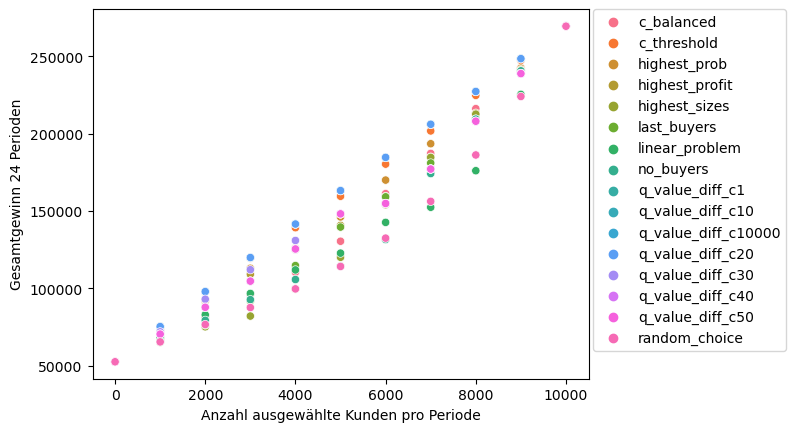

In [38]:
sns_plot = sns.scatterplot(data=e, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("Gesamtgewinn 24 Perioden")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden pro Periode")
plot.savefig(path +prefix+"vergleich_der_auswahlpolitiken_24_perioden.png", bbox_inches="tight", format="png", dpi=300)

C:\Users\olive\AppData\Local\Temp\ipykernel_3088\813710359.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_q_value = eval_q_value.append(e[e["models"].isin(["c_threshold"])])
C:\Users\olive\AppData\Local\Temp\ipykernel_3088\813710359.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_q_value = eval_q_value.append(e[e["models"].isin(["c_balanced"])])


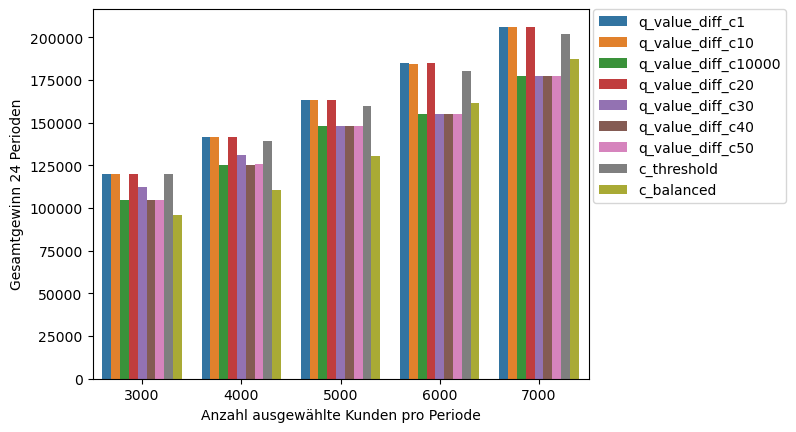

In [39]:
eval_q_value = e[e["models"].isin(["q_value_diff_c1", "q_value_diff_c10", "q_value_diff_c20", "q_value_diff_c30", "q_value_diff_c40", "q_value_diff_c50", "q_value_diff_c10000"])]
eval_q_value = eval_q_value.append(e[e["models"].isin(["c_threshold"])])
eval_q_value = eval_q_value.append(e[e["models"].isin(["c_balanced"])])
eval_q_value = eval_q_value[(eval_q_value["proms_sent"] > 2000) & (eval_q_value["proms_sent"] < 8000)]
sns_plot = sns.barplot(data=eval_q_value, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("Gesamtgewinn 24 Perioden")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden pro Periode")
plot.savefig(path +prefix+"dynamische_opt_vergleich_der_auswahlpolitiken_24_perioden.png", bbox_inches="tight", format="png", dpi=300)

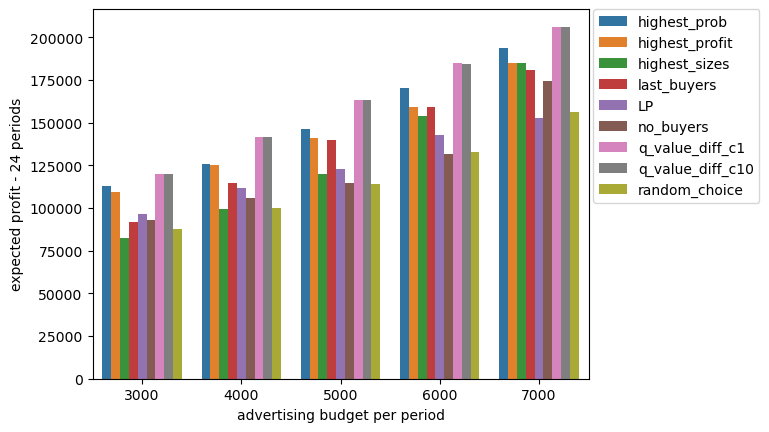

In [44]:
eval_chosen_models = e[e["models"].isin(['highest_prob', 'highest_profit', 'highest_sizes', 'last_buyers',
       'linear_problem', 'no_buyers', 'q_value_diff_c1', "q_value_diff_c10", "random_choice" ])] # , "q_value_highest_c"

eval_chosen_models.loc[eval_chosen_models["models"] == "linear_problem", ["models"]] = "LP"
eval_chosen_models = eval_chosen_models[(eval_chosen_models["proms_sent"] > 2000) & (eval_chosen_models["proms_sent"] < 8000)]
sns_plot = sns.barplot(data=eval_chosen_models, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("expected profit - 24 periods")
plot.axes[0].set_xlabel("advertising budget per period")
plot.savefig(path +prefix+"reduziert_vergleich_der_auswahlpolitiken_24_perioden.png", bbox_inches="tight", format="png", dpi=300)

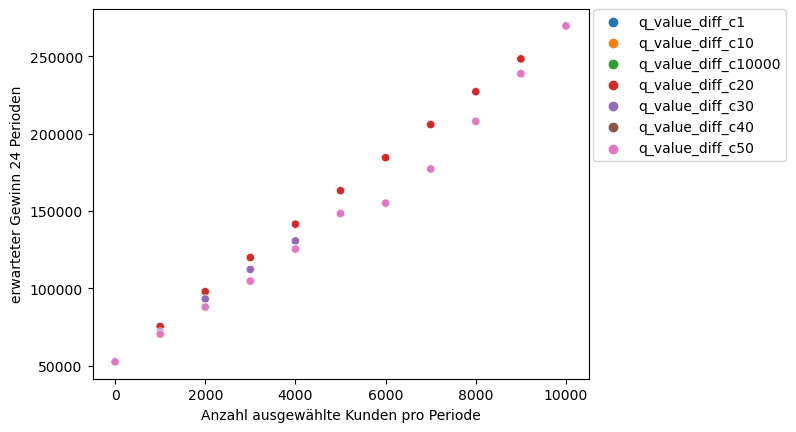

In [53]:
eval_q_value = e[e["models"].isin(["q_value_diff_c1", "q_value_diff_c10", "q_value_diff_c20", "q_value_diff_c30", "q_value_diff_c40", "q_value_diff_c50", "q_value_diff_c10000", "q_value_highest_c"])]
sns_plot = sns.scatterplot(data=eval_q_value, x="proms_sent", y="exp_profit", hue="models")
sns_plot.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plot = sns_plot.get_figure()
plot.axes[0].set_ylabel("Gesamtgewinn 24 Perioden")
plot.axes[0].set_xlabel("Anzahl ausgewählte Kunden pro Periode")
plot.savefig(path +prefix+"vergleich_der_auswahlpolitiken_24_perioden.png", bbox_inches="tight", format="png", dpi=300)